In [2]:
import pandas as pd
import numpy as np

data_train=pd.read_csv('task1_train_data.csv')
data_test=pd.read_csv('task1_test_data.csv')

data_train.head()
data_test.head()

,x_d,y_d
0,33.8465,59.3003
1,58.5384,119.9220
2,87.8723,194.7350
3,124.8290,266.9400
4,184.6340,327.4480


In [3]:
#训练数据与测试数据的赋值

X_train= data_train.loc[:,'x_d']
y_train= data_train.loc[:,'y_d']

X_test= data_test.loc[:,'x_d']
y_test= data_test.loc[:,'y_d']

print(X_train,y_train)

0     232.2740
1      64.8744
2      88.8854
3     116.5170
4     151.4440
5     186.4150
6     221.4130
7     243.1490
8     255.2350
9     268.5380
10    290.3210
11    309.6980
Name: x_d, dtype: float64 0     338.592
1     141.990
2     201.456
3     262.136
4     302.184
5     324.029
6     334.951
7     336.165
8     332.524
9     325.243
10    307.039
11    285.194
Name: y_d, dtype: float64


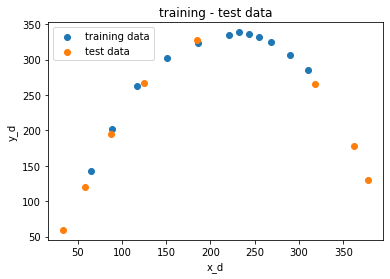

In [8]:
#数据可视化
from matplotlib import pyplot as plt
fig1=plt.figure()
data_train = plt.scatter(X_train,y_train,label='training data')
data_test=plt.scatter(X_test,y_test,label='test data')
plt.title('training - test data')
plt.xlabel('x_d')
plt.ylabel('y_d')
plt.legend()
plt.show()

In [57]:
#格式转换
X_train=np.array(X_train)

X_test=np.array(X_test)

X_train=X_train.reshape(-1,1)

X_test=X_test.reshape(-1,1)

#线性回归模型的建立与训练
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [58]:
#模型预测
y_train_predict=model1.predict(X_train)
y_test_predict=model1.predict(X_test)

In [59]:
#模型评估
from sklearn.metrics import r2_score
r2_train=r2_score(y_train,y_train_predict)
r2_test=r2_score(y_test,y_test_predict)
print(r2_train,r2_test)

0.5756251457400434 -1.6553718247964802


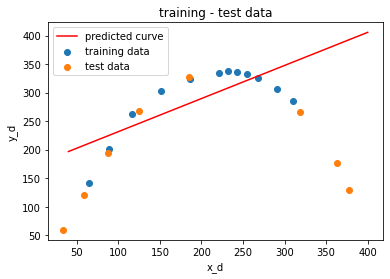

In [56]:
#结果可视化
X_range=np.linspace(40,400,300).reshape(-1,1)
y_range_predict=model1.predict(X_range)

fig2=plt.figure()
data_train = plt.scatter(X_train,y_train,label='training data')
data_test=plt.scatter(X_test,y_test,label='test data')
plt.plot(X_range,y_range_predict,'r',label='predicted curve')
plt.title('training - test data')
plt.xlabel('x_d')
plt.ylabel('y_d')
plt.legend()
plt.show()

In [60]:
#生成二阶属性数据
from sklearn.preprocessing import PolynomialFeatures

poly2=PolynomialFeatures(degree=2)

X_2_train = poly2.fit_transform(X_train)
X_2_test = poly2.transform(X_test)

print(X_train.shape,X_2_train.shape)
print(X_train[0:5],X_2_train[0:5])


(12, 1) (12, 3)
[[232.274 ]
 [ 64.8744]
 [ 88.8854]
 [116.517 ]
 [151.444 ]] [[1.00000000e+00 2.32274000e+02 5.39512111e+04]
 [1.00000000e+00 6.48744000e+01 4.20868778e+03]
 [1.00000000e+00 8.88854000e+01 7.90061433e+03]
 [1.00000000e+00 1.16517000e+02 1.35762113e+04]
 [1.00000000e+00 1.51444000e+02 2.29352851e+04]]


In [63]:
#建立新的回归模型
model2=LinearRegression()
model2.fit(X_2_train,y_train)

y_2_train_predict=model2.predict(X_2_train)
y_2_test_predict=model2.predict(X_2_test)

In [64]:
r2_2_train=r2_score(y_train,y_2_train_predict)
r2_2_test=r2_score(y_test,y_2_test_predict)
print(r2_2_train,r2_2_test)

0.9954725354913146 0.973853219157535


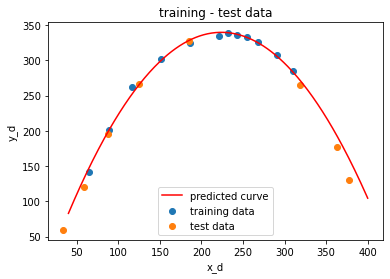

In [65]:
#结果可视化
X_range=np.linspace(40,400,300).reshape(-1,1)
X_2_range=poly2.transform(X_range)
y_2_range_predict=model2.predict(X_2_range)

fig3=plt.figure()
data_train = plt.scatter(X_train,y_train,label='training data')
data_test=plt.scatter(X_test,y_test,label='test data')
plt.plot(X_range,y_2_range_predict,'r',label='predicted curve')
plt.title('training - test data')
plt.xlabel('x_d')
plt.ylabel('y_d')
plt.legend()
plt.show()

In [43]:
#生成6阶属性数据
poly6=PolynomialFeatures(degree=6)

X_6_train = poly6.fit_transform(X_train)
X_6_test = poly6.transform(X_test)

In [66]:
model3=LinearRegression()
model3.fit(X_6_train,y_train)

y_6_train_predict=model3.predict(X_6_train)
y_6_test_predict=model3.predict(X_6_test)

In [67]:
r2_6_train=r2_score(y_train,y_6_train_predict)
r2_6_test=r2_score(y_test,y_6_test_predict)
print(r2_6_train,r2_6_test)

0.9996724711143301 -3.570947057565447


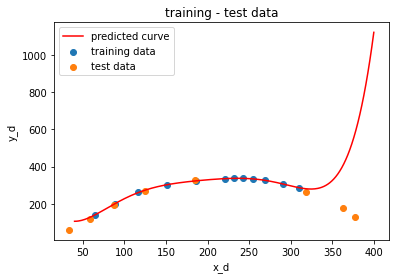

In [68]:
#结果可视化
X_range=np.linspace(40,400,300).reshape(-1,1)
X_6_range=poly6.transform(X_range)
y_6_range_predict=model3.predict(X_6_range)

fig3=plt.figure()
data_train = plt.scatter(X_train,y_train,label='training data')
data_test=plt.scatter(X_test,y_test,label='test data')
plt.plot(X_range,y_6_range_predict,'r',label='predicted curve')
plt.title('training - test data')
plt.xlabel('x_d')
plt.ylabel('y_d')
plt.legend()
plt.show()